In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os
os.chdir("".join((os.getcwd().split("PCNN")[0], "/PCNN/src/")))
#import run_core as rc
#import utils_core as utc
import utils as utc
#import libs.pclib as pclib
#import sim_core as smc
import core.build.pclib as pclib
from game.envs import *
from game.constants import *


#import pcnn_core as pcr
from IPython.display import clear_output
from tqdm import tqdm
import time

%load_ext autoreload
%autoreload 2

#plt.style.use('classic')

logger = utc.setup_logger("M", level=1)
logger()

2025-02-04 19:26:05 | 


pygame 2.5.2 (SDL 2.28.3, Python 3.11.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: 

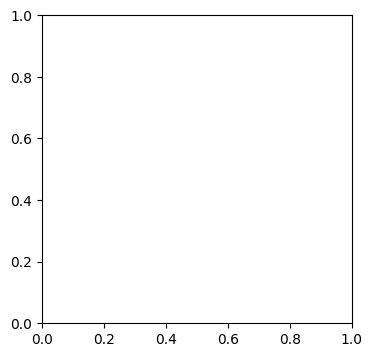

In [8]:
N = 300

gcn = pclib.GridNetworkSq([
       pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.08, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.07, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.05, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.03, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.005, bounds=[-1, 1, -1, 1])])

space = pclib.PCNNsqv2(N=N,
                       Nj=len(gcn),
                       gain=10.,
                       offset=1.2,
                       clip_min=0.01,
                       threshold=0.4,
                       rep_threshold=0.9,
                       rec_threshold=4.,
                       num_neighbors=4,
                       xfilter=gcn,
                       name="2D")



# random walk
speed = 0.08
size = 20.

points = [[0., 0.]]

s = np.array([speed, speed])
x, y = points[0]
old_point = points[0]

tot = 50_000

# record
activity = np.zeros((N, tot))

for t in range(tot):
    
    x += s[0]
    y += s[1]

    # hit wall
    if x <= 0 or x >= size:
        s[0] *= -1
        x += s[0]
    elif y <= 0 or y >= size:
        s[1] *= -1
        y += s[1]

    points += [[x, y]]
    if t % 500 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = speed * s / np.abs(s).sum()
        s = np.around(s, 3)

    activity[:, t] = space([points[-1][0]-old_point[0],
                         points[-1][1]-old_point[1]])[0]
    space.update()
    
    old_point = points[-1]

    if t % 100 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(4, 4))
        #plt.subplot(121)
        plt.plot(*np.array(points).T, 'k-', lw=0.3, alpha=0.3)
        
        plt.scatter(*np.array(space.get_position()).T, s=50, color="blue")
        plt.scatter(*np.array(space.get_centers()).T, s=50, color="blue", alpha=0.1)

        dist = np.around(np.linalg.norm((np.array(space.get_position())-np.array(points[-1]))), 2)
        plt.title(f"t={t}s N={len(space)} {dist=}")
        
        #plt.subplot(122)
        #plt.imshow(activity[:, t-500:t], cmap="plasma", aspect="auto")
        #plt.plot(range(len(activity)), len(activity) - activity*10, '-', color="white", lw=2)
        #plt.axis('off')
        
        plt.scatter(*points[-1], s=100, c='r')

        plt.xlim((-4, size+4))
        plt.ylim((-4, size+4))
        plt.pause(0.001)

In [18]:
_ = space([-p[0] + points[-1][0], -p[1] + points[-1][1]])

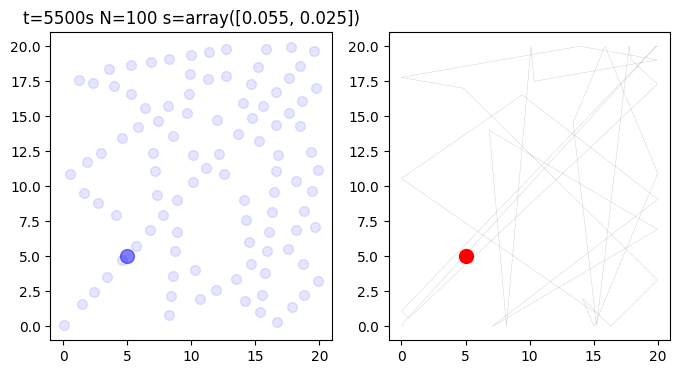

In [19]:
p = [5, 5]

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(*np.array(space.get_position()).T, s=100, color="blue", alpha=0.5)
plt.scatter(*np.array(space.get_centers()).T, s=50, color="blue", alpha=0.1)
#plt.scatter(*p, s=100, c='r')

plt.xlim((-1, size+1))
plt.ylim((-1, size+1))
plt.title(f"t={t}s N={len(space)} {s=}")

plt.subplot(122)
plt.plot(*np.array(points).T, 'k-', lw=0.3, alpha=0.2)
plt.scatter(*p, s=100, c='r')
plt.xlim((-1, size+1))
plt.ylim((-1, size+1))
plt.show()